# CSIS 3290 Fundamental of Machine Learning 

## Mini Project 01

### Team Name: TeamName
### Project Title: XXX
|   Team   |  SID |
|----------|------:|
| Derek Lam | 300356832 |
| Ryan Chan | 300367453 |
| Sunny Lam | 300362757 |

### Reference Site (Reserved Place)
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
2. https://matplotlib.org/stable/
3. https://seaborn.pydata.org/index.html

# Part A. Regression Modelling Requirement

# 2. Library import and data loading

In [1]:
# Here to import library for processing purpose
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


%matplotlib inline

# Here to load data in the unclean dataset for processing
df = pd.read_csv("unclean_data.csv")

# Here to take a peak of the file
print("Rows: {}, Columns: {}".format(*df.shape))

Rows: 4006, Columns: 11


# 3. Data Analysis, Preparation and Wrangling 

### a. Handling missing rows

In [2]:
# Here to handlle those rows that have all the NaN value
df.dropna(how = "all", inplace = True)

# Re-index the dataframe
df.reset_index(drop=True, inplace = True)

# To check whether rows where all are NaN value are dropped
print("Rows: {}, Columns: {}".format(*df.shape))

Rows: 3907, Columns: 11


### b. Handling the currency symbols and comma format

In [3]:
# Here to handle the '$' and the ',' symbols

df["price"] = (df["price"].str.replace("£","").str.replace(",",""))

# To check over all dataset in price columns with updated format
df['price']


0        30495
1        29989
2        37899
3        30399
4        29899
         ...  
3902     14700
3903     18500
3904     11900
3905     11300
3906     14800
Name: price, Length: 3907, dtype: object

### c. Handling non-valid column names

In [4]:
# Change those non-valid column names
df.rename(columns={'fuel type': 'fuel_type', 'fuel type2' : 'fuel_type2', 'engine size': 'engine_size', 'engine size2': 'engine_size2'}, inplace=True)
# Double check if the output is correct
df

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


### d. Handling missing values in columns: fuel_type

In [5]:
# Filling out the missing values fuel_types2 column with values from column fuel_type than the opposite.
df.fuel_type2.fillna(df.fuel_type, inplace = True)

# To drop the "fuel_type"
df.drop("fuel_type", axis = 1, inplace = True)

# To change the "fuel_type2" to "ful_type"
df.rename(columns={'fuel_type2': 'fuel_type'}, inplace = True)

# Double check the outcome reuslt 
df

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,"31,357",£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,"28,248",£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,"48,055",£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,"49,865",£145,56.5,Diesel,2.143,/ad/25144481


### e. Handling missing values and comma format in columns: mileage


In [6]:
# Filling out the NA value in the mileage column from mileage2 column
df.mileage.fillna(df.mileage2, inplace = True)

# Removing the "," character in the mileage column
df["mileage"] = (df["mileage"].str.replace(",",""))

# Dropping mileage2 column
df.drop("mileage2", axis = 1, inplace = True)

# Parsing the numerical value of mileage to string in order to remove the comma
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

# checking the output result with updated format
df

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,£150,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,£150,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,£20,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,£145,Diesel,2.143,/ad/25144481


In [7]:
# Double check mileage column with updated data type
df.dtypes

model            object
year            float64
price            object
transmission     object
mileage         float64
engine_size      object
fuel_type        object
engine_size2     object
reference        object
dtype: object

### g. Handling missing values and different value standard in columns: engine_size


In [8]:
# Filling out the NA value in the engine_size2 column from engine_size column
df.engine_size2.fillna(df.engine_size, inplace = True)

# Changing the type of the engine_size2 to numeric
df["engine_size2"] = pd.to_numeric(df['engine_size2'],errors='coerce')

# Creating lambda function to convert any Liter to cc
convert_cc = lambda x: round(x/1000,1) if x > 1000 else round (x,1)

# Applying the lambda function to the "engine_size2" column
df['engine_size2'] = df['engine_size2'].apply(convert_cc)

# Dropping the engine_size2 column
df.drop("engine_size", axis = 1, inplace = True)

# Renaming engine_size 
df.rename(columns = {"engine_size2": "engine_size"}, inplace = True)

#Double check the result with updated format
df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020.0,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


### h. Handling wrong data type: year

In [9]:
# Removing the NaN value in the dataset
df.dropna(inplace = True)

# Changing the data type of the year to integer
#df['year'].astype('int64')
df['year'] = df['year'].astype('int64')

# Checking the outcome results
df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3902,C Class,2017,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3903,C Class,2018,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3904,C Class,2014,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3905,C Class,2014,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


In [10]:
# Re-index the dataframe
df.reset_index(drop=True, inplace = True)

df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3893,C Class,2017,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3894,C Class,2018,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3895,C Class,2014,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3896,C Class,2014,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


### i. Handling unneeded columns

In [11]:
# Dropping unneeded columns
df.drop(columns = {'model','reference'}, axis = 1, inplace = True)

# Checking the outcome result
df

,year,price,transmission,mileage,fuel_type,engine_size
0,2020,30495,Automatic,1200.0,Diesel,2.0
1,2020,29989,Automatic,1000.0,Petrol,1.5
2,2020,37899,Automatic,500.0,Diesel,2.0
3,2019,30399,Automatic,5000.0,Diesel,2.0
4,2019,29899,Automatic,4500.0,Diesel,2.0
...,...,...,...,...,...,...
3893,2017,14700,Manual,31357.0,Diesel,1.6
3894,2018,18500,Automatic,28248.0,Diesel,2.1
3895,2014,11900,Manual,48055.0,Diesel,2.1
3896,2014,11300,Automatic,49865.0,Diesel,2.1


### j. Handling categorical data

In [12]:
# Getting the dummies value of transmission
transmission = (pd.get_dummies(df['transmission']))

# Merging the transmission columns
df = df.join(transmission)

# Checking result
df

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,Other,Semi-Auto
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,Manual,31357.0,Diesel,1.6,0,1,0,0
3894,2018,18500,Automatic,28248.0,Diesel,2.1,1,0,0,0
3895,2014,11900,Manual,48055.0,Diesel,2.1,0,1,0,0
3896,2014,11300,Automatic,49865.0,Diesel,2.1,1,0,0,0


In [13]:
# Repeating the above step on the "fuel_type" column
fuelType = pd.get_dummies(df['fuel_type'])

# Renameing the "other" values in "fuel_type" column
fuelType.rename(columns={'Other':'OtherFuel'}, inplace=True)

# Merging the transmission columns
df = df.join(fuelType)

# After that, dropping both "transmission" & " fuel_type" columns
df.drop(columns = {'transmission', 'fuel_type'}, axis = 1, inplace = True)

# Checking the output result
df

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3894,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3895,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3896,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


In [14]:
# Convert newly added columns from boolean into integer type columns mathcing the value of either 0 or 1
df[['Automatic', 'Manual', 'Other', 'Semi-Auto', 'Diesel','Hybrid','OtherFuel', 'Petrol' ]] = df[['Automatic', 'Manual', 'Other', 'Semi-Auto', 'Diesel','Hybrid','OtherFuel', 'Petrol']].astype(int)

# Check if the data type of specified columns were updated
df

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3894,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3895,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3896,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


### k. Saving the cleaned data into csv

In [15]:
# Making sure'price' columns are in numeric format
df['price'] = df['price'].astype(int)
df['year'] = df['year'].astype(int)


# Saving it into new file
df.to_csv('cleaned_data_v1.csv', index=False)
print("WRITE CSV:\n",df)

WRITE CSV:
       year  price  mileage  engine_size  Automatic  Manual  Other  Semi-Auto  \
0     2020  30495   1200.0          2.0          1       0      0          0   
1     2020  29989   1000.0          1.5          1       0      0          0   
2     2020  37899    500.0          2.0          1       0      0          0   
3     2019  30399   5000.0          2.0          1       0      0          0   
4     2019  29899   4500.0          2.0          1       0      0          0   
...    ...    ...      ...          ...        ...     ...    ...        ...   
3893  2017  14700  31357.0          1.6          0       1      0          0   
3894  2018  18500  28248.0          2.1          1       0      0          0   
3895  2014  11900  48055.0          2.1          0       1      0          0   
3896  2014  11300  49865.0          2.1          1       0      0          0   
3897  2014  14800  55445.0          2.1          1       0      0          0   

      Diesel  Hybrid  Other

# 4. Exploratory Data Analysis and Visualization

In [16]:
## Checking the basic statistics of the clean dataset
df.describe()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Checking out the correlation of the dataset
df.corr()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
year,1.000000,0.674218,-0.774710,-0.167651,-0.201754,-0.165483,-0.038814,0.273608,-0.133324,-0.096244,-0.009054,0.175537
price,0.674218,1.000000,-0.679101,0.373003,-0.098206,-0.241093,-0.020905,0.204057,-0.254683,-0.112066,-0.016542,0.306394
mileage,-0.774710,-0.679101,1.000000,0.100712,0.183310,0.220012,0.015795,-0.278694,0.176884,0.189994,0.045100,-0.260644
engine_size,-0.167651,0.373003,0.100712,1.000000,0.077083,-0.049730,0.031628,-0.055254,-0.033476,-0.002047,-0.002959,0.035237
Automatic,-0.201754,-0.098206,0.183310,0.077083,1.000000,-0.196322,-0.013559,-0.901168,0.022000,0.088895,0.046388,-0.061991
Manual,-0.165483,-0.241093,0.220012,-0.049730,-0.196322,1.000000,-0.003716,-0.246948,0.029954,-0.046562,-0.009107,-0.011111
Other,-0.038814,-0.020905,0.015795,0.031628,-0.013559,-0.003716,1.000000,-0.017055,0.013078,-0.003216,-0.000629,-0.012006
Semi-Auto,0.273608,0.204057,-0.278694,-0.055254,-0.901168,-0.246948,-0.017055,1.000000,-0.035372,-0.067205,-0.041803,0.066545
Diesel,-0.133324,-0.254683,0.176884,-0.033476,0.022000,0.029954,0.013078,-0.035372,1.000000,-0.245889,-0.048093,-0.918002
Hybrid,-0.096244,-0.112066,0.189994,-0.002047,0.088895,-0.046562,-0.003216,-0.067205,-0.245889,1.000000,-0.007882,-0.150452


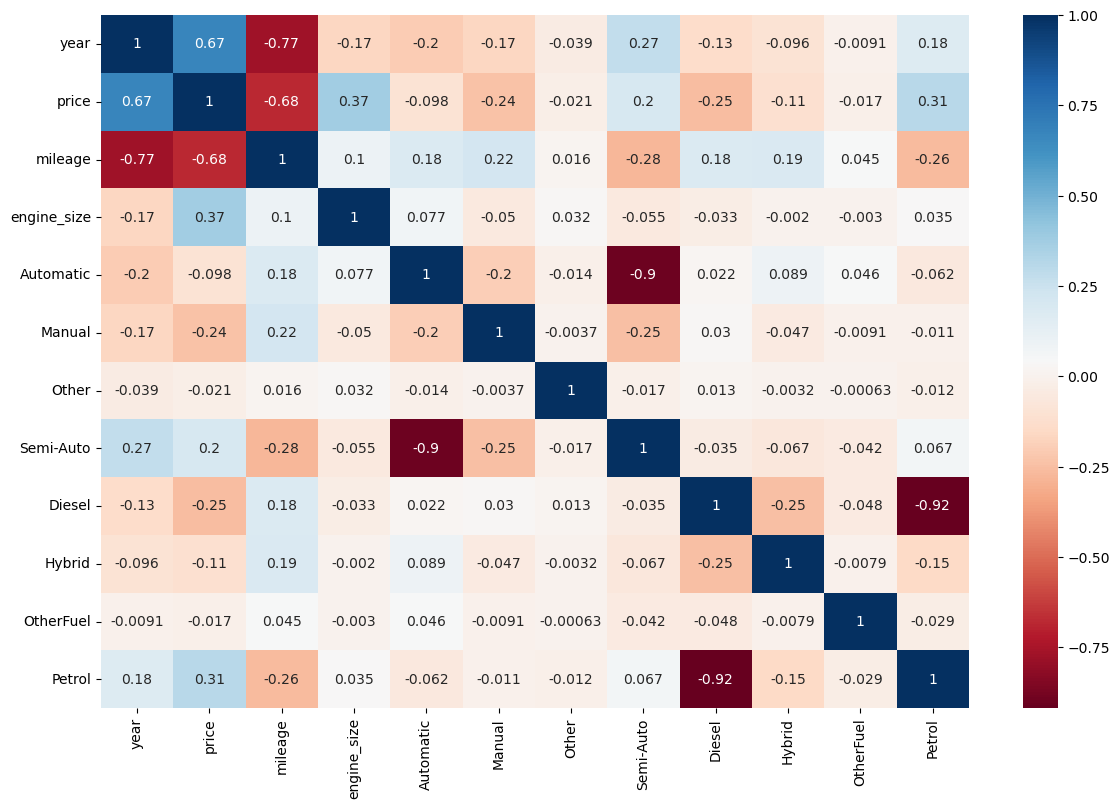

In [18]:
# Visualize them to make it clear to see
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights from correlation
As we can see from above information:
1. Year:
- has moderate positive relationship with price (Cars produced in later year have higher price)
- has negative relationship with mileage (Cars produced in later year have lower mileage)

2. Price:
- has moderate negative relationship with mileage (Cars with higher mileage have lower price)

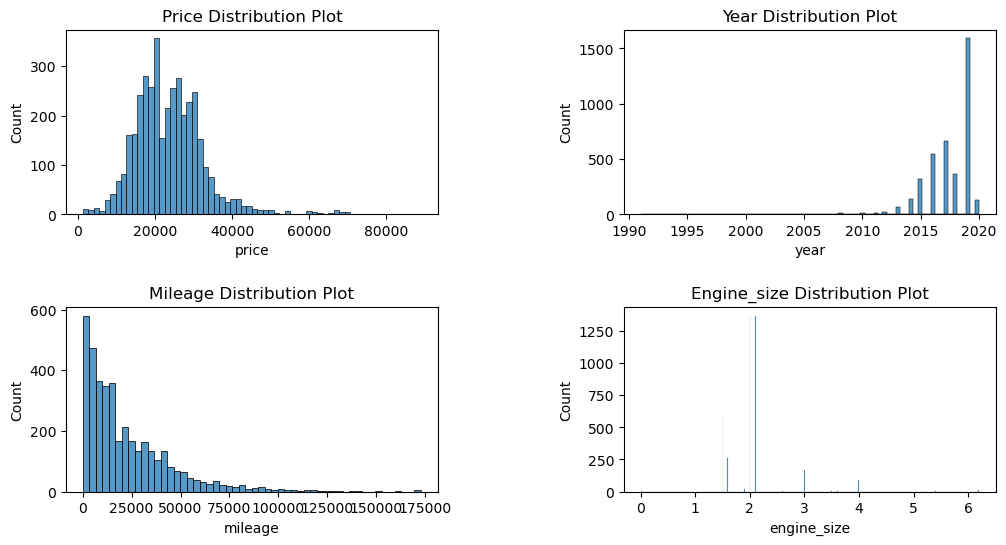

In [19]:
# Here we start on trying to visalize the data to see the relationship
plt.figure(figsize=(12,6))

# Ploting the Price Distribution plot
plt.subplot(2,2,1)
plt.title('Price Distribution Plot')
sns.histplot(df['price'])

# Ploting the Year Distribution plot
plt.subplot(2,2,2)
plt.title('Year Distribution Plot')
sns.histplot(df['year'])

# Ploting the Mileage Distribution plot
plt.subplot(2,2,3)
plt.title('Mileage Distribution Plot')
sns.histplot(df['mileage'])

# Ploting the Engine_size Distribution plot
plt.subplot(2,2,4)
plt.title('Engine_size Distribution Plot')
sns.histplot(df['engine_size'])

plt.subplots_adjust(wspace = 0.5, hspace=0.5)

plt.show()


### Graph plot information summary
- Mileage graph skewed toward left
- Year graph skewed toward right
- Price graph have a normal distribution with domain bewteen 0 - 50000
- Engine_size graph have a normal distribution with domain bewteen 1.5 - 2

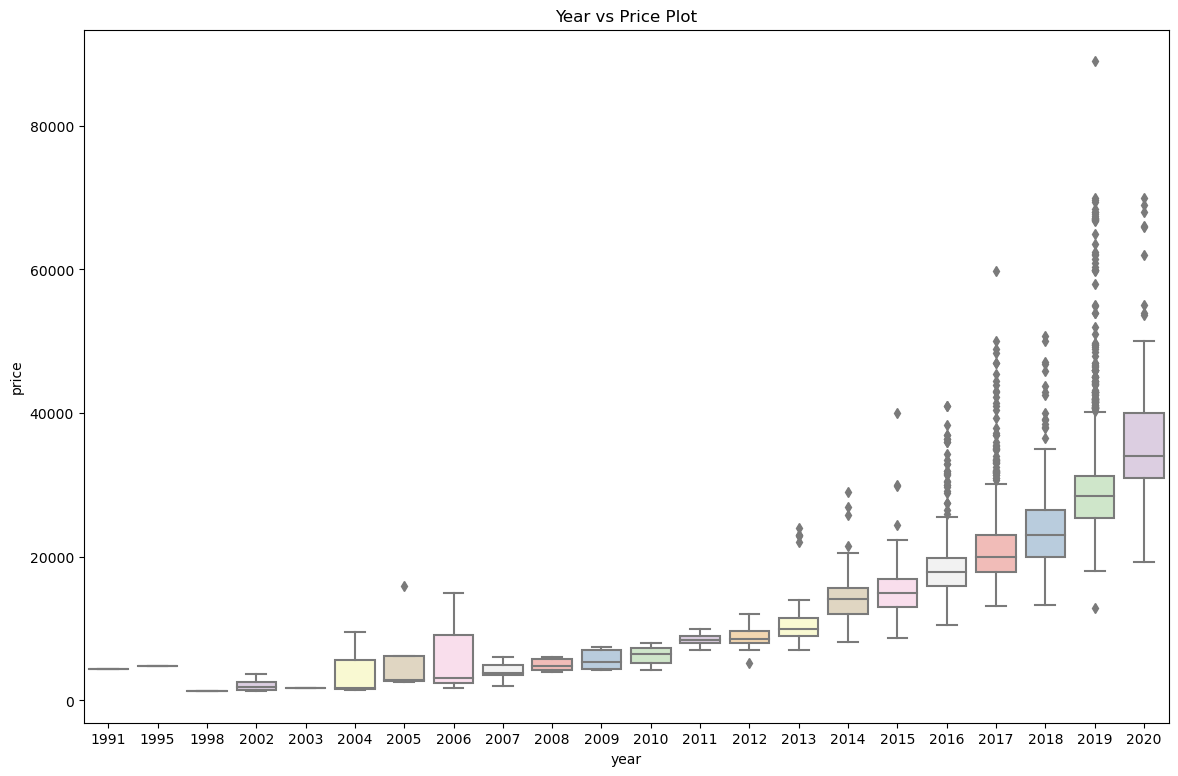

In [20]:
# Ploting the Price vs Year Distribution plot

plt.figure(figsize=(14,9))
plt.title('Year vs Price Plot')
sns.boxplot(y=df['price'], x=df['year'], palette=("Pastel1") )
plt.show()

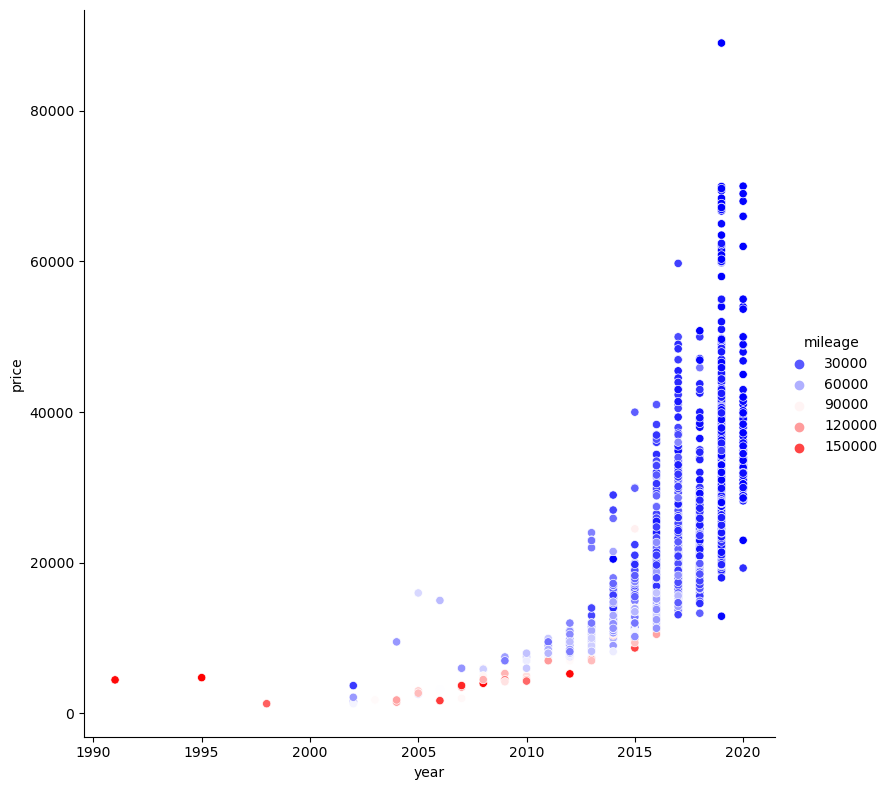

In [21]:
# Ploting the Price vs Mileage Distribution plot
sns.relplot(x=df['year'], y=df['price'], hue = df['mileage'], palette =('bwr'),height = 8)
plt.show()

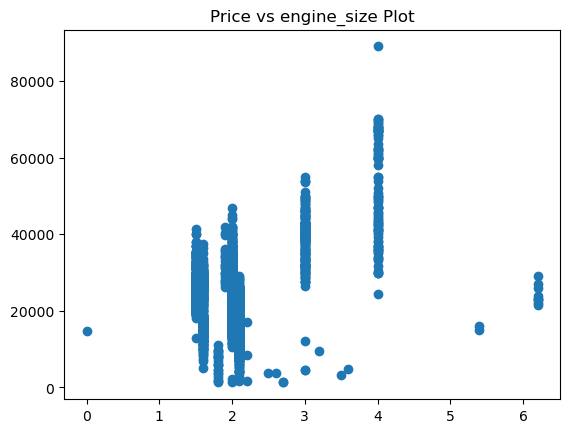

In [22]:
# Ploting the Price vs Engine_size Scatter plot

plt.scatter(df.engine_size, df.price)
plt.title("Price vs engine_size Plot")
plt.show()

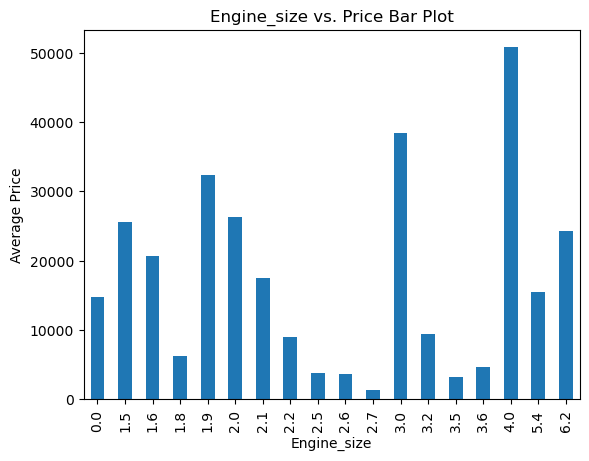

In [23]:
# Ploting the Average Price vs Engine_size Bar plot

average_price_groupy_by_engine_size = df.groupby('engine_size')['price'].mean()
average_price_groupy_by_engine_size.plot(kind='bar')
plt.xlabel('Engine_size')
plt.ylabel('Average Price')
plt.title('Engine_size vs. Price Bar Plot')
plt.show()

# 5. Feature Observation and Hypothesis

For the year, price, mileage, engine_size, they can be categorized as numerical data, while Automatic, Manual, Other, Semi-Auto, Diesel, Hybrid, OtherFuel	and Petrol can be defined as categorical data. 

In our model, we are using three features from the dataset: 'year', 'mileage', and 'engine_size'. 

- 'year' is the year when the car was produced.
- 'mileage' is the kilometers/ miles the vehicle has covered in its life time.
- 'engine_size' refers to the volume of fuel and air that can be pushed through a car's cylinders. The larger the engine size, the more fuel and air can fit inside creating a bigger boom, giving larger engines higher power.

Intuitively, for each feature we could make the following hypotheses:

    - Cars produced in later year (higher 'year' value) will be worth more. Usually, cars of updated model and produced in later year will embed more functions and technologies, so it is reasonable that they cost more money. They are directly proportional variables.
    
    - Cars with higher mileage (higher 'mileage' value) will be worth less. If the number of mileages is higher, it is likely that the buyers might need to bear more maintenance cost after purchasing it, so the cars with higher mileage will have lower price. They are inversely proportional variables.
    
    - Cars with larger engine (higher 'engine_size' value) will be worth more. Typically, a bigger engine means more air and fuel, which in turn creates more power and gives a car more oomph. If a car has more power, it can run faster than others and it is likely that cars with larger engine size are worth more. They are directly proportional variables.


# 6. A Simple Linear Regression Model

Our Linear Regression Model will use three features, including 'year', 'mileage', and 'engine_size'.

From the above EDA, we can acquire the following insights that illustrate how car price is affected:
1. Year has has moderate positive relationship with price (shown as 0.674218 in correlation result).
2. Mileage has moderate negative relationship with price (shown as -0.679101 in correlation result).
3. Althogh the trends between engine_size and price fluctuate in scatter plot and bar plot (average price and engine_size), the correlation value from engine_size is still the third highest value (shown as 0.373003 in correlation result) that worth our further evaluation. 



In [24]:
# divide the dataframe into features and response
response = df['price']
features = df[['year','mileage','engine_size']]

features.head()

,year,mileage,engine_size
0,2020,1200.0,2.0
1,2020,1000.0,1.5
2,2020,500.0,2.0
3,2019,5000.0,2.0
4,2019,4500.0,2.0


In [25]:
# split the dataset into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.1, random_state=42)
print("Training and Testing split was successful")

Training and Testing split was successful


In [26]:
# build the Linear Regression model and feed the traning dataset into the model built
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [27]:
# Obtain the predictions for the test dataset
predictions = model.predict(X_test)

In [28]:
# Calculate R^2 metrics
r2_train = model.score(X_train, Y_train)
print("R^2 in Training Set:", r2_train)

r2_test = model.score(X_test, Y_test)
print("R^2 in Testing Set:", r2_test)


R^2 in Training Set: 0.7520365500975299
R^2 in Testing Set: 0.7217476316543225


In [29]:
# Calculate RMSE metrics
mse = mean_squared_error(Y_test, predictions)

print("RMSE is: ", mse**0.5)


RMSE is:  5350.030455274335


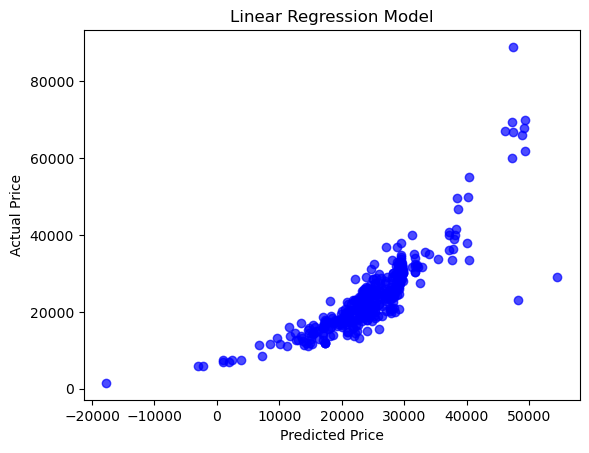

In [30]:
# Plot the prediction vs actual values
actual_values = Y_test
plt.scatter(predictions, actual_values, alpha=0.7, color='b')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title('Linear Regression Model')
plt.show()

In [31]:
# Print the coefficient list
feature_list = list(X_train.columns)
coef = model.coef_.transpose()
coef_table = np.vstack((feature_list, coef)).T
df_coefficient_list = pd.DataFrame (coef_table, columns = ['Feature', 'Coefficients'])
df_coefficient_list

,Feature,Coefficients
0,year,1930.4444792255565
1,mileage,-0.14082026662650807
2,engine_size,8830.3584539967


# 7. Linear Regression Model with Lasso/Ridge

## Supplementary information
1. Ridge Model will be used
2. All available features will be used (price cloumn as target variable & all other 11 columns as features) 
3. Standard Scaler will be applied

In [32]:
# Divide the dataframe into features and response
y_ridge = df.price
x_ridge = df.drop('price', axis = 1)


In [33]:
# scale the features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# calucate mean & STD and transform all value to standard value
zscore = ss.fit_transform(x_ridge)

feature_ss = pd.DataFrame(zscore, index = x_ridge.index, columns = x_ridge.columns)

feature_ss = feature_ss.reset_index(drop = True)

feature_ss.head()


,year,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,1.205805,-0.937427,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466
1,1.205805,-0.946281,-1.100221,1.181448,-0.231945,-0.016019,-1.064684,-1.224876,-0.200746,-0.039264,1.334284
2,1.205805,-0.968419,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466
3,0.752203,-0.769184,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466
4,0.752203,-0.791321,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466


In [34]:
# Split the dataset into training and testing sets
X_train_ss, X_test_ss, Y_train_ss, Y_test_ss = train_test_split(feature_ss, response, test_size=0.1, random_state = 42)


In [35]:
# Generate an array of alpha values
alphas = 10 ** np.linspace(30, -30, 20)

alphas

array([1.00000000e+30, 6.95192796e+26, 4.83293024e+23, 3.35981829e+20,
       2.33572147e+17, 1.62377674e+14, 1.12883789e+11, 7.84759970e+07,
       5.45559478e+04, 3.79269019e+01, 2.63665090e-02, 1.83298071e-05,
       1.27427499e-08, 8.85866790e-12, 6.15848211e-15, 4.28133240e-18,
       2.97635144e-21, 2.06913808e-24, 1.43844989e-27, 1.00000000e-30])

In [36]:
# Locate the best Alpha value
rmse_test_list = []
r2_test_list = []
r2_train_list = []

best_r2_test = 0
best_alpha = 0
counter = 0
best_counter = 0


for a in alphas:
    ridge = Ridge(alpha = a, max_iter = 1000)
    ridge.fit(X_train_ss, Y_train_ss)
    prediction = ridge.predict(X_test_ss)

    r2_train = ridge.score(X_train_ss, Y_train_ss)
    r2_train_list.append(r2_train)

    r2_test = ridge.score(X_test_ss, Y_test_ss)
    r2_test_list.append(r2_test)

    #rmse_test = mean_squared_error(y_test_ridge, prediction) **0.5
    rmse_test = np.sqrt(mean_squared_error(Y_test_ss, prediction))
    rmse_test_list.append(rmse_test)

    if r2_test > best_r2_test:
        best_r2_test = r2_test
        best_alpha = a
        best_counter = counter
        
    counter = counter +1

ridge_result = np.vstack((alphas, r2_train_list, r2_test_list, rmse_test_list)).T

ridge_df = pd.DataFrame(ridge_result, columns = ['Alpha', 'R2 Train', 'R2 Test', 'RMSE'])

print(ridge_df)
print()
print("best_alpha: ",best_alpha)
print()
print("Position:", best_counter)


           Alpha      R2 Train   R2 Test          RMSE
0   1.000000e+30  0.000000e+00 -0.001793  10151.396081
1   6.951928e+26  0.000000e+00 -0.001793  10151.396081
2   4.832930e+23  0.000000e+00 -0.001793  10151.396081
3   3.359818e+20  0.000000e+00 -0.001793  10151.396081
4   2.335721e+17  4.063416e-14 -0.001793  10151.396081
5   1.623777e+14  5.861134e-11 -0.001793  10151.396081
6   1.128838e+11  8.430943e-08 -0.001793  10151.395732
7   7.847600e+07  1.212576e-04 -0.001694  10150.893963
8   5.455595e+04  1.446437e-01  0.118196   9524.076935
9   3.792690e+01  7.708499e-01  0.735359   5217.532418
10  2.636651e-02  7.709184e-01  0.736451   5206.760199
11  1.832981e-05  7.709184e-01  0.736452   5206.753038
12  1.274275e-08  7.709184e-01  0.736452   5206.753033
13  8.858668e-12  7.709184e-01  0.736452   5206.753033
14  6.158482e-15  7.709184e-01  0.736452   5206.753033
15  4.281332e-18  7.709184e-01  0.736452   5206.753033
16  2.976351e-21  7.709184e-01  0.736452   5206.753013
17  2.0691

In [37]:
# Find out the R^2 metrics and RMSE using the best Alpha value

ridge = Ridge(alpha = best_alpha)

ridge.fit(X_train_ss, Y_train_ss)
prediction = ridge.predict(X_test_ss)

print('R^2 train:', ridge.score(X_train_ss, Y_train_ss))
print('R^2 test:', ridge.score(X_test_ss, Y_test_ss))
print('RMSE test:', mean_squared_error(prediction, Y_test_ss) **0.5)
print()


R^2 train: 0.770714322528803
R^2 test: 0.7378754647561725
RMSE test: 5192.66919489133



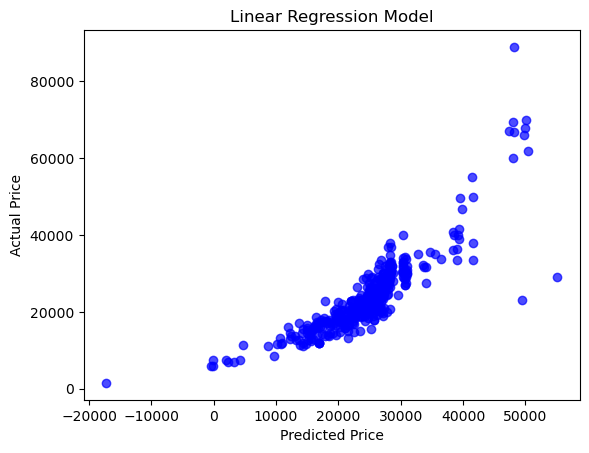

In [38]:
# Plot the prediction vs actual values
actual_value = Y_test_ss
plt.scatter(prediction, actual_value, alpha=0.7, color='b')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title('Linear Regression Model')
plt.show()

In [39]:
feat = list(X_train_ss.columns)
coef_ss = ridge.coef_.transpose()

coef_table = np.vstack((feat, coef_ss)).T
df = pd.DataFrame(coef_table, columns=['Feature', 'Coef.(SS)'])
df

,Feature,Coef.(SS)
0,year,4300.302158830424
1,mileage,-2751.777356611256
2,engine_size,4211.2764971453
3,Automatic,-3.90699198266365e+16
4,Manual,-1.7438490147763908e+16
5,Other,-1268835670440032.8
6,Semi-Auto,-3.953661645007858e+16
7,Diesel,7.936526619469784e+16
8,Hybrid,3.1262422558341576e+16
9,OtherFuel,6351178952744710.0


# 8. (A) Polynomial Regression Model (without Lasso/Ridge)

In [40]:
# import library for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [41]:
# Here to load data in the cleaned dataset for processing
df = pd.read_csv("cleaned_data_v1.csv")

# check
df

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3894,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3895,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3896,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


In [42]:
# Divide the dataframe into features and response

#response
y = df.price

#features
x = df.drop('price', axis = 1)

In [43]:
# scale the features
ss = StandardScaler()

# calucate mean & STD and transform all value to standard value
zscore_poly = ss.fit_transform(x)
feature_poly_ss = pd.DataFrame(zscore_poly, index = x.index, columns = x.columns)
feature_poly_ss = feature_poly_ss.reset_index(drop = True)
feature_poly_ss.head()

,year,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,1.205805,-0.937427,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466
1,1.205805,-0.946281,-1.100221,1.181448,-0.231945,-0.016019,-1.064684,-1.224876,-0.200746,-0.039264,1.334284
2,1.205805,-0.968419,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466
3,0.752203,-0.769184,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466
4,0.752203,-0.791321,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466


In [44]:
# split the dataset into training and testing sets
X_train_poly_ss, X_test_poly_ss, Y_train_poly_ss, Y_test_poly_ss = train_test_split(feature_poly_ss, y, test_size=0.1, random_state = 42)

In [45]:
# declare variables to store the results
r2_train_poly_result_list = []
r2_test_poly_result_list = []
rmse_poly_result_list = []
degree_poly_list = []

In [46]:
# define a function to apply polynomial regression model
def applyPolynomialRegression(input_degree):
    
    degree_poly_list.append(input_degree)
    
    # create polynomial features
    poly = PolynomialFeatures(degree = input_degree)
    X_train_poly_fitted = poly.fit_transform(X_train_poly_ss)


    # fit a polynomial regression model
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train_poly_fitted, Y_train_poly_ss)


    # make predictions
    X_test_poly_transformed = poly.transform(X_test_poly_ss)
    y_pred =lin_reg_model.predict(X_test_poly_transformed)


    # show the result
    # calculate R^2 metrics
    r2_train_poly = lin_reg_model.score(X_train_poly_fitted, Y_train_poly_ss)
    r2_train_poly_result_list.append(r2_train_poly)
    print("R^2 in Training Set: ", r2_train_poly)

    r2_test_poly = lin_reg_model.score(X_test_poly_transformed, Y_test_poly_ss)
    r2_test_poly_result_list.append(r2_test_poly)
    print("R^2 in Testing Set: ", r2_test_poly)

    rmse_poly = np.sqrt(mean_squared_error(Y_test_poly_ss, y_pred))
    rmse_poly_result_list.append(rmse_poly)
    print("RMSE is: ", rmse_poly)

    # Get the coefficients from the polynomial regression model
    print("Number of features used in the model: ", len(lin_reg_model.coef_))
    # Plot the prediction vs actual values
    %matplotlib inline
    actual_value = Y_test_poly_ss
    plt.scatter(y_pred, actual_value, alpha=0.7, color='b')
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Polynomial Regression Model (Degree = " + str(input_degree) + ")")
    plt.show()

    
    print("------------------------------------------------------------------------------------")


R^2 in Training Set:  0.8675222415013721
R^2 in Testing Set:  0.8556529285322552
RMSE is:  3853.3708539434447
Number of features used in the model:  78


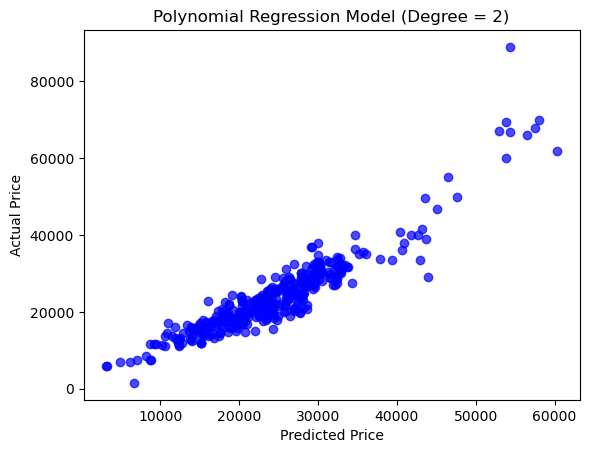

------------------------------------------------------------------------------------
R^2 in Training Set:  0.8984715840354734
R^2 in Testing Set:  0.9017948178130192
RMSE is:  3178.3668493521286
Number of features used in the model:  364


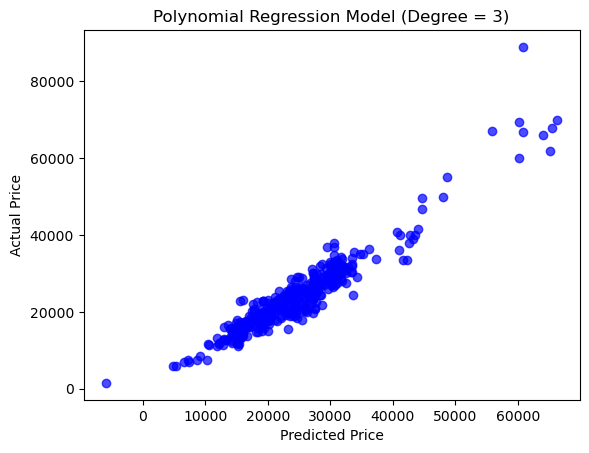

------------------------------------------------------------------------------------
R^2 in Training Set:  0.9113200129749774
R^2 in Testing Set:  0.9117700894665821
RMSE is:  3012.622663699448
Number of features used in the model:  1365


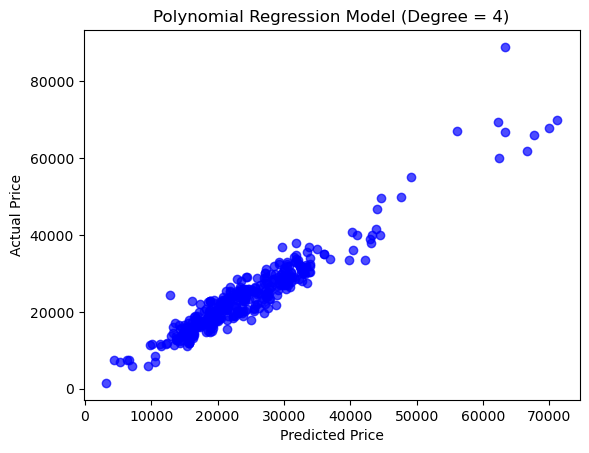

------------------------------------------------------------------------------------
R^2 in Training Set:  0.9160445680034665
R^2 in Testing Set:  -9.246842214434869
RMSE is:  32466.228722507978
Number of features used in the model:  4368


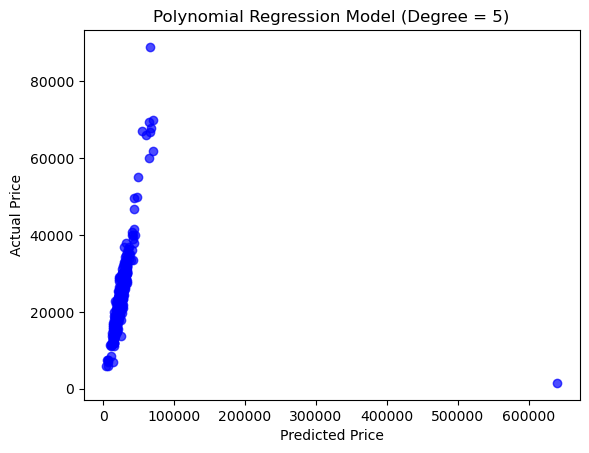

------------------------------------------------------------------------------------


In [47]:
#clear the result list first
r2_train_poly_result_list.clear()
r2_test_poly_result_list.clear()
rmse_poly_result_list.clear()
degree_poly_list.clear()

# call the function above to apply polynomial regression
for i in range(2, 6):
    applyPolynomialRegression(i)

In [48]:
# list the results for comparison
poly_result_list = np.vstack((degree_poly_list, r2_train_poly_result_list, r2_test_poly_result_list, rmse_poly_result_list)).T

poly_result_df = pd.DataFrame(poly_result_list, columns = ['Degree', 'R2 Train', 'R2 Test', 'RMSE'])
print(poly_result_df)
print()

   Degree  R2 Train   R2 Test          RMSE
0     2.0  0.867522  0.855653   3853.370854
1     3.0  0.898472  0.901795   3178.366849
2     4.0  0.911320  0.911770   3012.622664
3     5.0  0.916045 -9.246842  32466.228723



### Observation

#### 1.	Increasing the polynomial degree improves the model’s performance up to a certain point (degree 4 in the case), as indicated by higher R2 and lower RMSE.
#### 2.	Degree 5 leads to overfitting, where the model fits the training data too closely but performs poorly on new, unseen data.
#### 3.	Although Degree 3 and 4 produce better results over Degree 2, they may also bear the risk of overfitting. Further validation should be conducted.

# 8. (B) Polynomial Regression Model with Ridge Regularization

In [49]:
r2_train_poly_ridge_result_list = []
r2_test_poly_ridge_result_list = []
rmse_poly_ridge_result_list = []
degree_poly_ridge_list = []

import warnings
# Filter out the specific warning
warnings.filterwarnings("ignore", message="Singular matrix in solving dual problem. Using least-squares solution instead.", category=UserWarning)

# Filter out the specific LinAlgWarning
warnings.filterwarnings("ignore", message="Ill-conditioned matrix.*")

In [50]:
# define a function to apply polynomial regression model with Ridge Regularization
def applyPolynomialRegression_Ridge(input_degree):
    r2_train_poly_ridge_list = []
    r2_test_poly_ridge_list = []
    rmse_poly_ridge_list = []
    
    best_r2_test_poly_ridge = 0
    best_alpha_poly_ridge = 0
    counter_poly_ridge = 0
    best_counter_poly_ridge = 0
    
    degree_poly_ridge_list.append(input_degree)
    
    # Generate an array of alpha values
    alphas = 10 ** np.linspace(40, -40, 20)   
    
    # create polynomial features
    poly = PolynomialFeatures(degree = input_degree)
    X_train_poly_fitted = poly.fit_transform(X_train_poly_ss)

    # Fit a polynomial regression model with Ridge regularization
    for alpha in alphas:
        ridge_model = Ridge(alpha = alpha, max_iter = 1000)
        ridge_model.fit(X_train_poly_fitted, Y_train_poly_ss)

        # Make predictions
        X_test_poly_transformed = poly.transform(X_test_poly_ss)
        y_pred_poly_ridge = ridge_model.predict(X_test_poly_transformed)
        
        # calculate the metrics
        r2_train_poly_ridge = ridge_model.score(X_train_poly_fitted, Y_train_poly_ss)
        r2_train_poly_ridge_list.append(r2_train_poly_ridge)
        
        r2_test_poly_ridge = ridge_model.score(X_test_poly_transformed, Y_test_poly_ss)
        r2_test_poly_ridge_list.append(r2_test_poly_ridge)
        
        rmse_poly_ridge = np.sqrt(mean_squared_error(Y_test_poly_ss, y_pred_poly_ridge))
        rmse_poly_ridge_list.append(rmse_poly_ridge)
        
        if r2_test_poly_ridge > best_r2_test_poly_ridge:
            best_r2_test_poly_ridge = r2_test_poly_ridge
            best_alpha_poly_ridge = alpha
            best_counter_poly_ridge = counter_poly_ridge
        
        counter_poly_ridge = counter_poly_ridge + 1

    # show the result
    poly_ridge_result = np.vstack((alphas, r2_train_poly_ridge_list, r2_test_poly_ridge_list, rmse_poly_ridge_list)).T
    poly_ridge_df = pd.DataFrame(poly_ridge_result, columns = ['Alpha', 'R2 Train', 'R2 Test', 'RMSE'])
    print("Polynomial Regression (Degree = " + str(input_degree) + ") with Ridge Regularization:")
    print()
    print(poly_ridge_df)
    print()
    print("best_alpha: ", best_alpha_poly_ridge)    
    print("Position:", best_counter_poly_ridge)
    print()
    
#--------------------------------------------------------------------------
# use the best alpha value to apply polynoimal regress with ridge
    # apply the model
    ridge_model = Ridge(alpha = best_alpha_poly_ridge)
    ridge_model.fit(X_train_poly_fitted, Y_train_poly_ss)
    y_pred_poly_ridge = ridge_model.predict(X_test_poly_transformed)
        
    # calculate the result metric
    r2_train_poly_ridge = ridge_model.score(X_train_poly_fitted, Y_train_poly_ss)
    r2_test_poly_ridge = ridge_model.score(X_test_poly_transformed, Y_test_poly_ss)
    rmse_poly_ridge = np.sqrt(mean_squared_error(Y_test_poly_ss, y_pred_poly_ridge))
    r2_train_poly_ridge_result_list.append(r2_train_poly_ridge)
    r2_test_poly_ridge_result_list.append(r2_test_poly_ridge)
    rmse_poly_ridge_result_list.append(rmse_poly_ridge)
    
    print('Applied the best alpha value to the model:')
    print('R^2 train:', r2_train_poly_ridge)
    print('R^2 test:', r2_test_poly_ridge)
    print('RMSE test:', rmse_poly_ridge)
     # Plot the prediction vs actual values
    %matplotlib inline
    actual_value = Y_test_poly_ss
    plt.scatter(y_pred_poly_ridge, actual_value, alpha=0.7, color='b')
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Polynomial Regression Model (Degree = " + str(input_degree) + ") with Ridge Regularization")
    plt.show()

    print("------------------------------------------------------------------------------------")
    
    

Polynomial Regression (Degree = 2) with Ridge Regularization:

           Alpha      R2 Train   R2 Test          RMSE
0   1.000000e+40  0.000000e+00 -0.001793  10151.396081
1   6.158482e+35  0.000000e+00 -0.001793  10151.396081
2   3.792690e+31  0.000000e+00 -0.001793  10151.396081
3   2.335721e+27  0.000000e+00 -0.001793  10151.396081
4   1.438450e+23  0.000000e+00 -0.001793  10151.396081
5   8.858668e+18  8.104628e-15 -0.001793  10151.396081
6   5.455595e+14  1.304438e-10 -0.001793  10151.396081
7   3.359818e+10  2.117797e-06 -0.001791  10151.388815
8   2.069138e+06  2.558470e-02  0.020103  10039.843038
9   1.274275e+02  8.689155e-01  0.857883   3823.492159
10  7.847600e-03  8.704380e-01  0.861830   3770.026033
11  4.832930e-07  8.704380e-01  0.861830   3770.023197
12  2.976351e-11  8.704380e-01  0.861830   3770.023197
13  1.832981e-15  8.704380e-01  0.861830   3770.023197
14  1.128838e-19  8.704380e-01  0.861830   3770.023265
15  6.951928e-24  8.704391e-01  0.861828   3770.045071
16

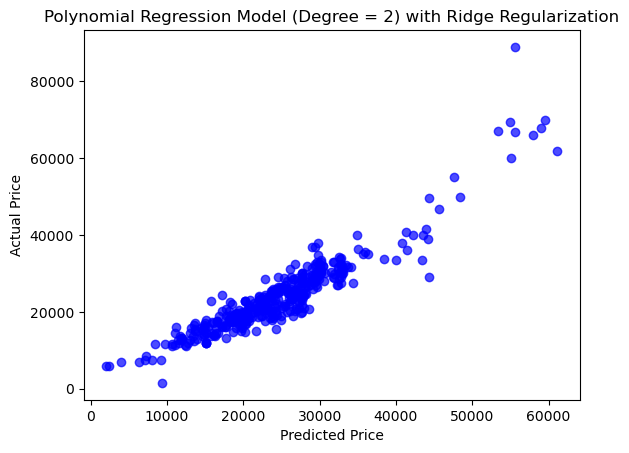

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 3) with Ridge Regularization:

           Alpha      R2 Train   R2 Test          RMSE
0   1.000000e+40  0.000000e+00 -0.001793  10151.396081
1   6.158482e+35  0.000000e+00 -0.001793  10151.396081
2   3.792690e+31  0.000000e+00 -0.001793  10151.396081
3   2.335721e+27  0.000000e+00 -0.001793  10151.396081
4   1.438450e+23  4.440892e-16 -0.001793  10151.396081
5   8.858668e+18  6.923351e-12 -0.001793  10151.396081
6   5.455595e+14  1.124028e-07 -0.001793  10151.396057
7   3.359818e+10  4.961658e-04 -0.001746  10151.158737
8   2.069138e+06  1.716860e-01  0.153628   9330.771782
9   1.274275e+02  8.980146e-01  0.900926   3192.399798
10  7.847600e-03  8.987523e-01  0.900602   3197.618593
11  4.832930e-07  8.987544e-01  0.900601   3197.628296
12  2.976351e-11  8.987554e-01  0.900601   3197.628238
13  1.832981e-15  8.987554e-01  0.900601   3197.628202
14  1.128838e-19  8.987553e

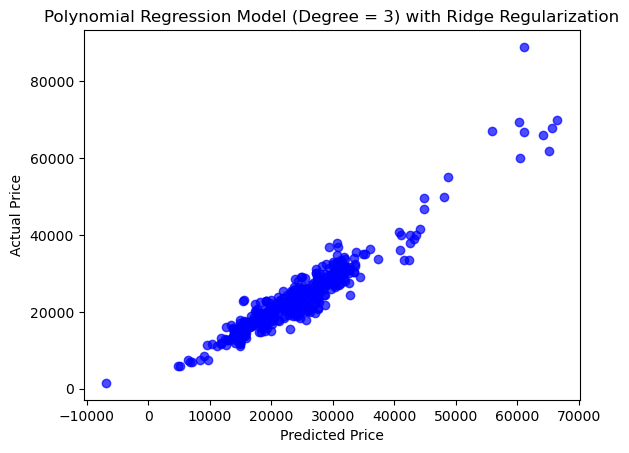

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 4) with Ridge Regularization:

           Alpha      R2 Train   R2 Test          RMSE
0   1.000000e+40  0.000000e+00 -0.001793  10151.396081
1   6.158482e+35  0.000000e+00 -0.001793  10151.396081
2   3.792690e+31  0.000000e+00 -0.001793  10151.396081
3   2.335721e+27  1.110223e-16 -0.001793  10151.396081
4   1.438450e+23  1.606826e-12 -0.001793  10151.396081
5   8.858668e+18  2.609235e-08 -0.001793  10151.396078
6   5.455595e+14  2.537004e-04 -0.001784  10151.353609
7   3.359818e+10  1.984679e-03 -0.001216  10148.471370
8   2.069138e+06  3.516476e-01  0.384695   7955.766388
9   1.274275e+02  9.081355e-01  0.912898   2993.296525
10  7.847600e-03  9.113628e-01  0.912588   2998.628291
11  4.832930e-07  9.113644e-01  0.912340   3002.873537
12  2.976351e-11  9.113644e-01  0.912340   3002.874453
13  1.832981e-15  9.113644e-01  0.912339   3002.897693
14  1.128838e-19  9.112477e

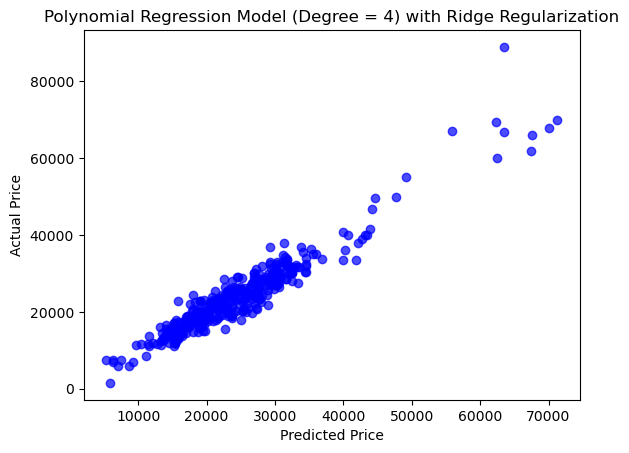

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 5) with Ridge Regularization:

           Alpha      R2 Train   R2 Test          RMSE
0   1.000000e+40  0.000000e+00 -0.001793  10151.396081
1   6.158482e+35  0.000000e+00 -0.001793  10151.396081
2   3.792690e+31  0.000000e+00 -0.001793  10151.396081
3   2.335721e+27  3.845813e-13 -0.001793  10151.396081
4   1.438450e+23  6.246164e-09 -0.001793  10151.396081
5   8.858668e+18  8.780565e-05 -0.001790  10151.383088
6   5.455595e+14  7.632970e-04 -0.001735  10151.101169
7   3.359818e+10  1.407309e-02  0.005072  10116.555803
8   2.069138e+06  5.062446e-01  0.595622   6449.565055
9   1.274275e+02  9.120947e-01  0.879477   3521.049128
10  7.847600e-03  8.996719e-01  0.881924   3485.126537
11  4.832930e-07  8.996878e-01  0.882044   3483.346221
12  2.976351e-11  8.996878e-01  0.882044   3483.346221
13  1.832981e-15  8.996878e-01  0.882044   3483.346221
14  1.128838e-19  8.996878e

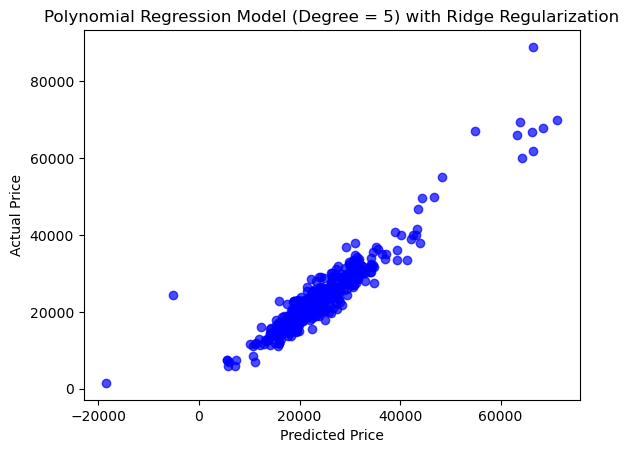

------------------------------------------------------------------------------------


In [51]:
#clear the result list first
r2_train_poly_ridge_result_list.clear()
r2_test_poly_ridge_result_list.clear()
rmse_poly_ridge_result_list.clear()
degree_poly_ridge_list.clear()

# call the function above to apply polynomial regression
for i in range(2, 6):
    applyPolynomialRegression_Ridge(i)


In [52]:
print("Applied Polynomial Regression (without Ridge Regularization):")
print(poly_result_df)
print()

print("Applied Polynomial Regression (with Ridge Regularization):")
poly_ridge_result_list = np.vstack((degree_poly_ridge_list, r2_train_poly_ridge_result_list, r2_test_poly_ridge_result_list, rmse_poly_ridge_result_list)).T
poly_result_ridge_df = pd.DataFrame(poly_ridge_result_list, columns = ['Degree', 'R2 Train', 'R2 Test', 'RMSE'])
print(poly_result_ridge_df)
print()

Applied Polynomial Regression (without Ridge Regularization):
   Degree  R2 Train   R2 Test          RMSE
0     2.0  0.867522  0.855653   3853.370854
1     3.0  0.898472  0.901795   3178.366849
2     4.0  0.911320  0.911770   3012.622664
3     5.0  0.916045 -9.246842  32466.228723

Applied Polynomial Regression (with Ridge Regularization):
   Degree  R2 Train   R2 Test         RMSE
0     2.0  0.870054  0.862692  3758.237467
1     3.0  0.896675  0.901821  3177.936401
2     4.0  0.908136  0.912898  2993.296525
3     5.0  0.899688  0.882044  3483.346221



## Observation:
#### 1. Polynomial regression with Ridge regularization generally provides better generalization and reduces overfitting compared to non-regularized polynomial regression.
#### 2. The choice of the best model (degree) depends on the balance between complexity and generalization we aim to achieve, and it may require further cross-validation to make a final decision. 

# Part B Competition

In [53]:
#To import the competition_data 
dcomp = pd.read_csv('competition_data.csv')

# have a look
dcomp.head()

,Unnamed: 0,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,0,2020.0,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,1,2020.0,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2,2020.0,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,3,2019.0,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,4,2019.0,29899,4500.0,2.0,1,0,0,0,1,0,0,0


In [98]:
# drop the first column since it is only an index
dcomp = dcomp.drop(dcomp.columns[0], axis=1)

# check
dcomp.head()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,2020.0,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020.0,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020.0,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019.0,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019.0,29899,4500.0,2.0,1,0,0,0,1,0,0,0


In [99]:
## Checking the basic statistics of the competition dataset
dcomp.describe()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
mean,2017.341288,23662.959969,22378.806518,246.505733,0.417501,0.051065,0.000257,0.531178,0.600205,0.038748,0.001540,0.359507
std,2.204979,8894.733784,22589.428526,703.211619,0.493210,0.220158,0.016019,0.499091,0.489919,0.193018,0.039213,0.479918
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17690.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14640.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32442.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,69995.000000,173000.000000,6208.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# Checking out the correlation of the dataset
dcomp.corr()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
year,1.000000,0.677500,-0.774672,-0.287352,-0.201624,-0.165451,-0.038814,0.273478,-0.133123,-0.096213,-0.009047,0.175332
price,0.677500,1.000000,-0.682020,-0.133014,-0.097297,-0.242321,-0.021019,0.203717,-0.254180,-0.112461,-0.016582,0.306063
mileage,-0.774672,-0.682020,1.000000,0.306875,0.183136,0.219983,0.015793,-0.278523,0.176631,0.189968,0.045096,-0.260400
engine_size,-0.287352,-0.133014,0.306875,1.000000,0.350314,0.049718,0.062740,-0.370131,-0.004439,0.087935,-0.013656,-0.029720
Automatic,-0.201624,-0.097297,0.183136,0.350314,1.000000,-0.196392,-0.013563,-0.901149,0.021740,0.088860,0.046384,-0.061721
Manual,-0.165451,-0.242321,0.219983,0.049718,-0.196392,1.000000,-0.003716,-0.246922,0.029887,-0.046574,-0.009109,-0.011034
Other,-0.038814,-0.021019,0.015793,0.062740,-0.013563,-0.003716,1.000000,-0.017053,0.013076,-0.003217,-0.000629,-0.012003
Semi-Auto,0.273478,0.203717,-0.278523,-0.370131,-0.901149,-0.246922,-0.017053,1.000000,-0.035087,-0.067164,-0.041799,0.066246
fuel_type_Diesel,-0.133123,-0.254180,0.176631,-0.004439,0.021740,0.029887,0.013076,-0.035087,1.000000,-0.246000,-0.048115,-0.917969
fuel_type_Hybrid,-0.096213,-0.112461,0.189968,0.087935,0.088860,-0.046574,-0.003217,-0.067164,-0.246000,1.000000,-0.007884,-0.150419


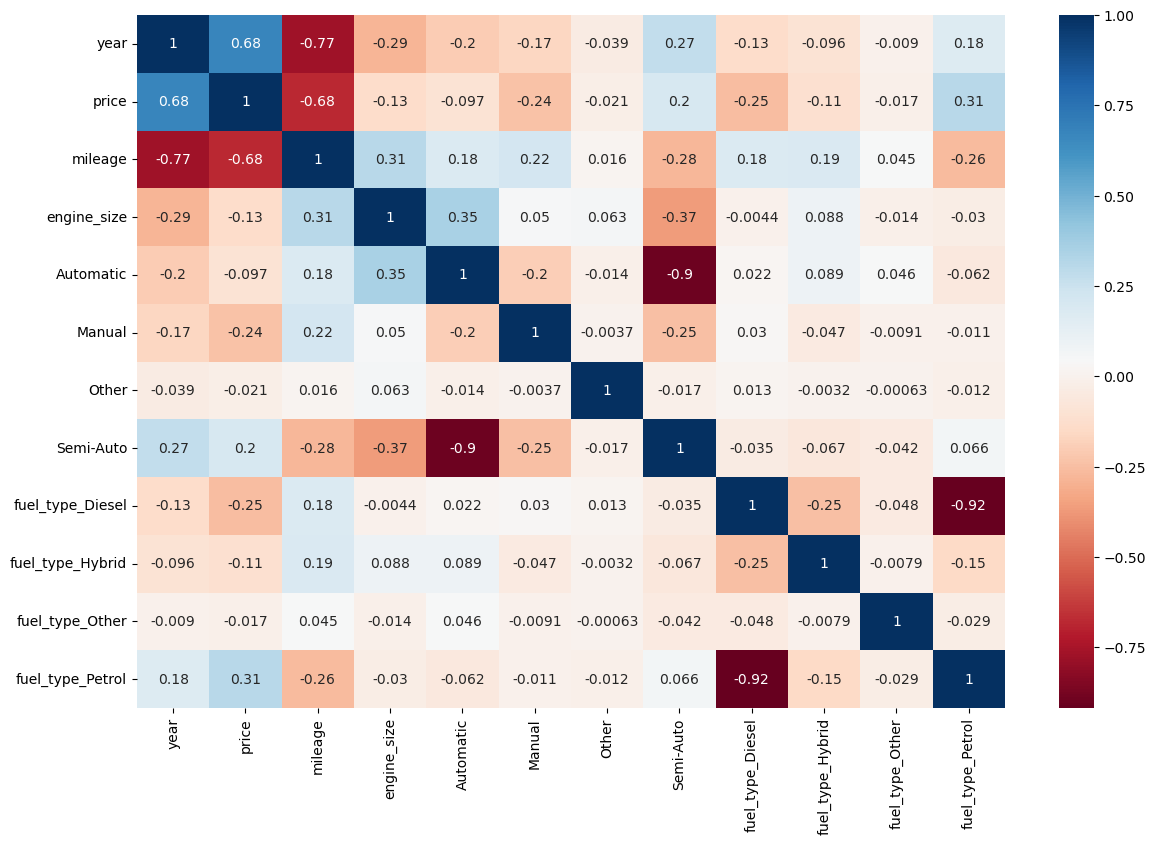

In [101]:
# Visualize them to make it clear to see
plt.figure(figsize=(14,9))
sns.heatmap(dcomp.corr(), annot = True, cmap="RdBu")
plt.show()

In [102]:
# Spliting them into reposonse and features
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
resp_comp = dcomp['price']
feat_comp = dcomp.drop('price', axis = 1)


In [103]:
# scale the features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# calucate mean & STD and transform all value to standard value
zscore_comp = ss.fit_transform(feat_comp)
feat_comp_ss = pd.DataFrame(zscore_comp, index = feat_comp.index, columns = feat_comp.columns)
feat_comp_ss = feat_comp_ss.reset_index(drop = True)
feat_comp_ss.head()

,year,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,1.205931,-0.937674,-0.347743,1.181188,-0.231976,-0.016021,-1.064427,0.816147,-0.200773,-0.039269,-0.749198
1,1.205931,-0.946529,-0.348454,1.181188,-0.231976,-0.016021,-1.064427,-1.225269,-0.200773,-0.039269,1.334760
2,1.205931,-0.968666,-0.347743,1.181188,-0.231976,-0.016021,-1.064427,0.816147,-0.200773,-0.039269,-0.749198
3,0.752354,-0.769432,-0.347743,1.181188,-0.231976,-0.016021,-1.064427,0.816147,-0.200773,-0.039269,-0.749198
4,0.752354,-0.791569,-0.347743,1.181188,-0.231976,-0.016021,-1.064427,0.816147,-0.200773,-0.039269,-0.749198


In [112]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Split the data into training and testing subsets
X_train_linear, X_test_linear, Y_train_linear, Y_test_linear = train_test_split(feat_comp_ss, resp_comp, test_size=0.1, random_state = 1024)

# Making sure split is completed
print("Training and testing split was completed.")

Training and testing split was completed.


## Training and testing
### Model: Linear

In [113]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_linear,Y_train_linear)

LinearRegression()

In [114]:
# get the predictions for the test dataset
predictions_linear = model.predict(X_test_linear)

## Calculate the performance metric

In [186]:
from sklearn.metrics import mean_squared_error

r2_comp_train = model.score(X_train_linear,Y_train_linear)
print ("R2 train:", r2_comp_train)

r2_comp_test = model.score(X_test_linear,Y_test_linear)
print ("R2 test:", r2_comp_test)

rmse = mean_squared_error(Y_test_linear, predictions_linear)**0.5
print ("RMSE:", rmse)

R2 train: 0.5573090872965887
R2 test: 0.5815839375381543
RMSE: 6099.057076474759


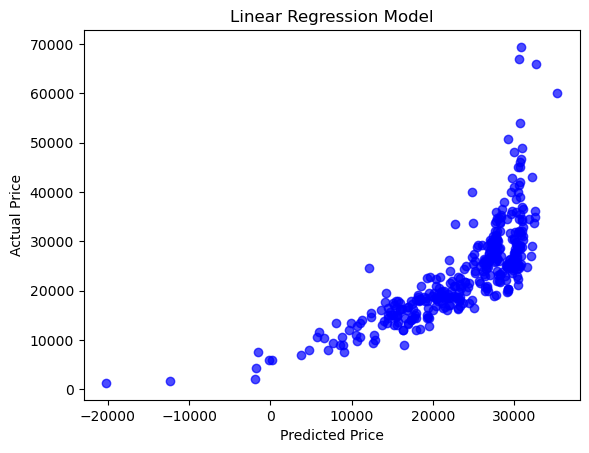

In [117]:
actual_values = Y_test_linear
plt.scatter(predictions_linear, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [118]:
# To print out the coefficient list
feat_list = list(X_train_linear.columns)
coef = model.coef_.transpose()
coef_table = np.vstack((feat_list, coef)).T
df_coeff_list = pd.DataFrame(coef_table, columns=['Feature', 'Coefficients'])
df_coeff_list

,Feature,Coefficients
0,year,3668.091071008912
1,mileage,-3009.0418674230705
2,engine_size,838.0009899179876
3,Automatic,3.076180041829996e+16
4,Manual,1.3731406899875792e+16
5,Other,999112791415065.4
6,Semi-Auto,3.1128593021063936e+16
7,fuel_type_Diesel,1548428133460608.0
8,fuel_type_Hybrid,610048798382258.4
9,fuel_type_Other,123936279994141.78


## Model: Polynomial Regression

In [119]:
#importing polynomial regression library
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline
#polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Split the data into training and testing subsets
Xcomp_train_poly, Xcomp_test_poly, Ycomp_train_poly, Ycomp_test_poly = train_test_split(feat_comp_ss, resp_comp, test_size=0.1, random_state = 1024)

# Making sure split is completed
print("Training and testing split was completed.")

Training and testing split was completed.


In [120]:
# declare variables to store the results
r2_comp_train_poly_result_list = []
r2_comp_test_poly_result_list = []
rmse_comp_poly_result_list = []
degree_comp_poly_list = []

In [121]:
# define a function to apply polynomial regression model
def applyPolynomialRegression_comp(input_degree):
    
    degree_comp_poly_list.append(input_degree)
    
    # create polynomial features
    poly_comp = PolynomialFeatures(degree = input_degree)
    Xcomp_train_poly_fitted = poly_comp.fit_transform(Xcomp_train_poly)


    # fit a polynomial regression model
    lin_reg_model_comp = LinearRegression()
    lin_reg_model_comp.fit(Xcomp_train_poly_fitted, Ycomp_train_poly)


    # make predictions
    Xcomp_test_poly_transformed = poly_comp.transform(Xcomp_test_poly)
    y_pred_comp =lin_reg_model_comp.predict(Xcomp_test_poly_transformed)


    # show the result
    # calculate R^2 metrics
    r2_comp_train_poly = lin_reg_model_comp.score(Xcomp_train_poly_fitted, Ycomp_train_poly)
    r2_comp_train_poly_result_list.append(r2_comp_train_poly)
    print("R^2 in Training Set: ", r2_comp_train_poly)

    r2_comp_test_poly = lin_reg_model_comp.score(Xcomp_test_poly_transformed, Ycomp_test_poly)
    r2_comp_test_poly_result_list.append(r2_comp_test_poly)
    print("R^2 in Testing Set: ", r2_comp_test_poly)

    rmse_comp_poly = np.sqrt(mean_squared_error(Ycomp_test_poly, y_pred_comp))
    rmse_comp_poly_result_list.append(rmse_comp_poly)
    print("RMSE is: ", rmse_comp_poly)

    # Get the coefficients from the polynomial regression model
    print("Number of features used in the model: ", len(lin_reg_model_comp.coef_))
    # Plot the prediction vs actual values
    %matplotlib inline
    actual_value_comp = Ycomp_test_poly
    plt.scatter(y_pred_comp, actual_value_comp, alpha=0.7, color='b')
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Polynomial Regression Model (Degree = " + str(input_degree) + ")")
    plt.show()

    
    print("------------------------------------------------------------------------------------")

R^2 in Training Set:  0.7592396600458051
R^2 in Testing Set:  0.800386038606971
RMSE is:  4212.636440707245
Number of features used in the model:  78


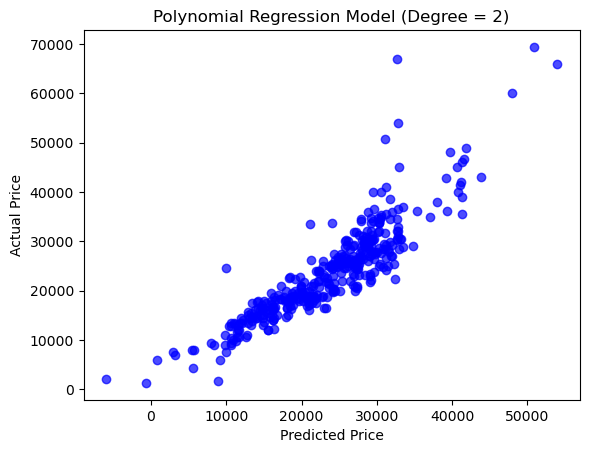

------------------------------------------------------------------------------------
R^2 in Training Set:  0.8053981481973127
R^2 in Testing Set:  0.8320953249603316
RMSE is:  3863.580075909495
Number of features used in the model:  364


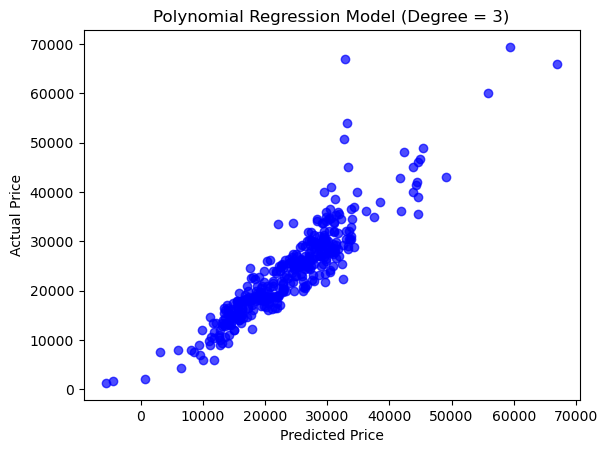

------------------------------------------------------------------------------------
R^2 in Training Set:  0.8203951403074363
R^2 in Testing Set:  0.7277517603327623
RMSE is:  4919.727675459894
Number of features used in the model:  1365


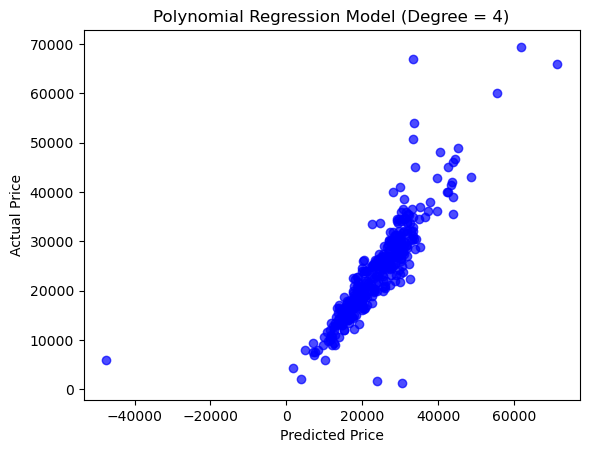

------------------------------------------------------------------------------------
R^2 in Training Set:  0.814695377819995
R^2 in Testing Set:  -0.6902818732795055
RMSE is:  12258.521428371736
Number of features used in the model:  4368


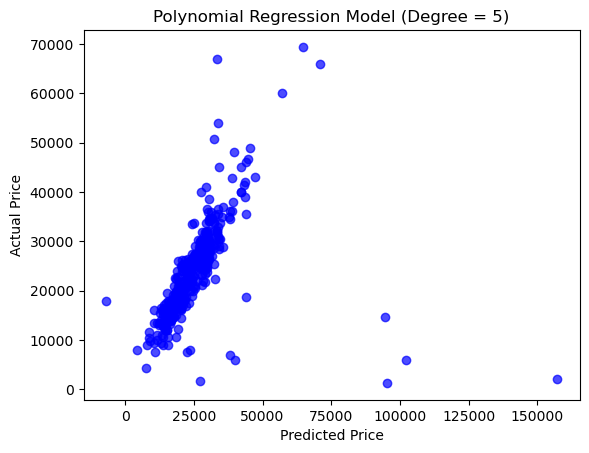

------------------------------------------------------------------------------------


In [122]:
#clear the result list first
r2_comp_train_poly_result_list.clear()
r2_comp_test_poly_result_list.clear()
rmse_comp_poly_result_list.clear()
degree_comp_poly_list.clear()

# call the function above to apply polynomial regression
for i in range(2, 6):
    applyPolynomialRegression_comp(i)

In [95]:
# list the results for comparison
comp_poly_result_list = np.vstack((degree_comp_poly_list, r2_comp_train_poly_result_list, r2_comp_test_poly_result_list, rmse_comp_poly_result_list)).T

comp_poly_result_df = pd.DataFrame(comp_poly_result_list, columns = ['Degree', 'R2 Train', 'R2 Test', 'RMSE'])
print(comp_poly_result_df)
print()

   Degree  R2 Train        R2 Test          RMSE
0     2.0  0.764431       0.801220  4.203829e+03
1     3.0  0.790967       0.806080  4.152119e+03
2     4.0  0.828627       0.522954  6.512361e+03
3     5.0  0.847852 -539370.292599  6.924724e+06



## Model: Ridge

In [128]:
# import the libraries
from sklearn.linear_model import Ridge, Lasso

In [165]:
# Creating alphas
alphas = 10**np.linspace(7,0,20)
alphas

array([1.00000000e+07, 4.28133240e+06, 1.83298071e+06, 7.84759970e+05,
       3.35981829e+05, 1.43844989e+05, 6.15848211e+04, 2.63665090e+04,
       1.12883789e+04, 4.83293024e+03, 2.06913808e+03, 8.85866790e+02,
       3.79269019e+02, 1.62377674e+02, 6.95192796e+01, 2.97635144e+01,
       1.27427499e+01, 5.45559478e+00, 2.33572147e+00, 1.00000000e+00])

In [166]:
xtrain_ridge, xtest_ridge, ytrain_ridge, ytest_ridge = train_test_split(feat_comp_ss, resp_comp, test_size = 0.1, random_state=1024)

ridge_comp = Ridge()
coefs_comp = []
for a in alphas:
    ridge_comp.set_params(alpha = a)
    ridge_comp.fit(feat_comp_ss, resp_comp)
    coefs_comp.append(ridge_comp.coef_)
    
np.shape(coefs_comp)

(20, 11)

Text(0, 0.5, 'weights')

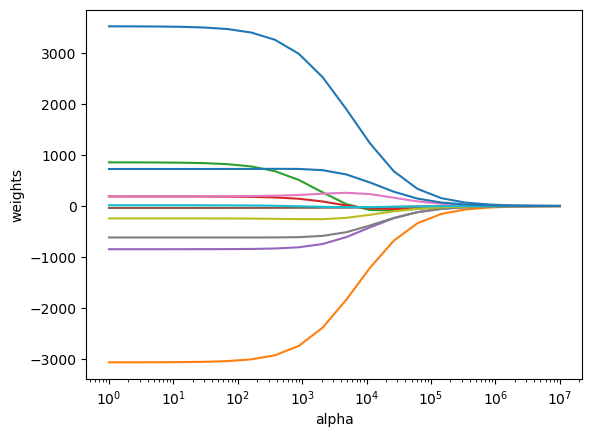

In [167]:
plt.plot(alphas, coefs_comp)
ax = plt.gca()
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [170]:
# let's ridge them!

rmse_test_list = []
r2_test_list = []
r2_train_list = []

best_r2_test_ridge = 0
best_alpha_ridge  = 0
counter = 0
best_counter = 0

for a in alphas:
    ridge = Ridge(alpha = a, max_iter = 1000)
    ridge.fit(xtrain_ridge, ytrain_ridge)
    # Make prediction in the test set
    pred_comp = ridge.predict(xtest_ridge)
    
    #ridge.score(x,y) is the code to find out the r-square
    r2_train_ridge = ridge.score(xtrain_ridge,ytrain_ridge)
    r2_train_list.append(r2_train_ridge)

    #To find out the R-square for the test set
    r2_test_ridge = ridge.score(xtest_ridge,ytest_ridge)
    r2_test_list.append(r2_test_ridge)
    
    #To find out the R-square for the test set
    rmse_test_ridge = mean_squared_error(ytest_ridge,pred_comp)**0.5
    rmse_test_list.append(rmse_test_ridge)
    
    if r2_test_ridge > best_r2_test_ridge:
        best_r2_test_ridge = r2_test_ridge
        best_alpha_ridge = a
        best_counter = counter
        
    counter = counter + 1
            
# Above pattern is the same,first create it, then fit it in the model
# To generate a table of the above results, by using "np.vstack()", and remmber to use the transpose to make row become col, cole become row, rotate 90 degree
ridge_result = np.vstack((alphas, r2_train_list, r2_test_list, rmse_test_list)).T
ridge_df = pd.DataFrame(ridge_result, columns = ['Alphas', 'R2 Train', 'R2 Test', 'RMSE'])
print(ridge_df)
print("Best Alpha is at : ",best_alpha_ridge)
print()
print("Position:", best_counter)

          Alphas  R2 Train   R2 Test         RMSE
0   1.000000e+07  0.000833  0.000281  9427.521356
1   4.281332e+06  0.001942  0.001463  9421.948156
2   1.832981e+06  0.004518  0.004207  9408.989794
3   7.847600e+05  0.010458  0.010536  9379.041314
4   3.359818e+05  0.023926  0.024886  9310.782914
5   1.438450e+05  0.053314  0.056205  9160.041961
6   6.158482e+04  0.112361  0.119142  8849.352216
7   2.636651e+04  0.213066  0.226450  8292.829063
8   1.128838e+04  0.342917  0.364406  7517.068830
9   4.832930e+03  0.456819  0.484048  6772.722671
10  2.069138e+03  0.522313  0.550897  6318.753778
11  8.858668e+02  0.547927  0.575552  6142.865599
12  3.792690e+02  0.555303  0.581800  6097.480630
13  1.623777e+02  0.557024  0.582816  6090.073404
14  6.951928e+01  0.557380  0.582810  6090.111260
15  2.976351e+01  0.557449  0.582712  6090.831985
16  1.274275e+01  0.557462  0.582650  6091.280951
17  5.455595e+00  0.557464  0.582620  6091.499885
18  2.335721e+00  0.557464  0.582607  6091.598596


In [187]:
# find out the coefficient for the best result
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(xtrain_ridge, ytrain_ridge)
pred_ridge = ridge.predict(xtest_ridge)

print("R2 train:", ridge.score(xtrain_ridge, ytrain_ridge))
print("R2 test:", ridge.score(xtest_ridge, ytest_ridge))
print("RMSE test:", mean_squared_error(pred_ridge,ytest_ridge) ** 0.5)
print()   
print(pd.Series(ridge.coef_,index = feat_comp_ss.columns))

R2 train: 0.5570243519890823
R2 test: 0.5828156507443776
RMSE test: 6090.073403818658

year                3405.458314
mileage            -2973.129517
engine_size          760.816598
Automatic            173.421046
Manual              -877.213912
Other                -35.216763
Semi-Auto            216.708255
fuel_type_Diesel    -603.035559
fuel_type_Hybrid    -243.603247
fuel_type_Other       11.338691
fuel_type_Petrol     712.650805
dtype: float64


## Model: Lasso

In [69]:
alphas = np.linspace(1,0.01,10)

In [172]:
xtrain_lasso, xtest_lasso, ytrain_lasso, ytest_lasso = train_test_split(feat_comp_ss,resp_comp, test_size = 0.1, random_state=1024)


In [174]:
# let's put them in the lasso! yee haw
# let's Lasso them!

rmse_test_list = []
r2_test_list = []
r2_train_list = []

best_r2_test_lasso = 0
best_alpha_lasso  = 0
counter = 0
best_counter = 0


for a in alphas:
    lasso = Lasso(alpha = a, max_iter = 1000)
    lasso.fit(xtrain_lasso, ytrain_lasso)
    # Make prediction in the test set
    pred_lasso = lasso.predict(xtest_lasso)
    
    #ridge.score(x,y) is the code to find out the r-square
    r2_train_lasso = lasso.score(xtrain_lasso,ytrain_lasso)
    r2_train_list.append(r2_train_lasso)

    #To find out the R-square for the test set
    r2_test_lasso = lasso.score(xtest_lasso, ytest_lasso)
    r2_test_list.append(r2_test_lasso)
    
    #To find out the R-square for the test set
    rmse_test_lasso = mean_squared_error(ytest_lasso,pred_lasso)**0.5
    rmse_test_list.append(rmse_test_lasso)
    
    if r2_test_lasso > best_r2_test_lasso:
        best_r2_test_lasso = r2_test_lasso
        best_alpha_lasso = a
        best_counter = counter
        
    counter = counter + 1
            
# Above pattern is the same,first create it, then fit it in the model
# To generate a table of the above results, by using "np.vstack()", and remmber to use the transpose to make row become col, cole become row, rotate 90 degree
lasso_result = np.vstack((alphas, r2_train_list, r2_test_list, rmse_test_list)).T
lasso_df = pd.DataFrame(lasso_result, columns = ['Alphas', 'R2 Train', 'R2 Test', 'RMSE'])

print(lasso_df)
print()
print("Best alpha valus is:", best_alpha_lasso)
print()
print("Position:", best_counter)


          Alphas  R2 Train   R2 Test         RMSE
0   1.000000e+07  0.000000 -0.000606  9431.703763
1   4.281332e+06  0.000000 -0.000606  9431.703763
2   1.832981e+06  0.000000 -0.000606  9431.703763
3   7.847600e+05  0.000000 -0.000606  9431.703763
4   3.359818e+05  0.000000 -0.000606  9431.703763
5   1.438450e+05  0.000000 -0.000606  9431.703763
6   6.158482e+04  0.000000 -0.000606  9431.703763
7   2.636651e+04  0.000000 -0.000606  9431.703763
8   1.128838e+04  0.000000 -0.000606  9431.703763
9   4.832930e+03  0.171549  0.183025  8522.419831
10  2.069138e+03  0.453838  0.484412  6770.333475
11  8.858668e+02  0.524190  0.556255  6280.947217
12  3.792690e+02  0.549473  0.577199  6130.932964
13  1.623777e+02  0.555927  0.582079  6095.446876
14  6.951928e+01  0.557110  0.582743  6090.602800
15  2.976351e+01  0.557385  0.582784  6090.305760
16  1.274275e+01  0.557449  0.582711  6090.835852
17  5.455595e+00  0.557461  0.582650  6091.285269
18  2.335721e+00  0.557464  0.582620  6091.503341


In [188]:
# find out the coefficient for the best result

lasso = Lasso(alpha = best_alpha_lasso)
lasso.fit(xtrain_lasso, ytrain_lasso)             # Fit a lasso regression on the training data
pred_lasso = lasso.predict(xtest_lasso)           # Use this model to predict the test data
print("R2 train:", lasso.score(xtrain_lasso,ytrain_lasso))
print("R2 test:", lasso.score(xtest_lasso, ytest_lasso))
print("RMSE test:", mean_squared_error(ytest_lasso,pred_lasso)**0.5)
print()      
print(pd.Series(lasso.coef_, index = feat_comp_ss.columns)) # Print coefficients      


R2 train: 0.5573852555680667
R2 test: 0.5827838162462007
RMSE test: 6090.305760009172

year                3533.185555
mileage            -3015.170002
engine_size          795.760547
Automatic             -0.000000
Manual              -948.191859
Other                -13.073959
Semi-Auto              0.000000
fuel_type_Diesel      -0.000000
fuel_type_Hybrid      -0.000000
fuel_type_Other       34.497408
fuel_type_Petrol    1277.723719
dtype: float64
